In [2248]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.stats import linregress
import random as random

In [2249]:
def ifZero(val):
    if val == 0:
        if random.random() < .5:
            return -1*random.random()
        else:
            return random.random()
    else:
        return val
def sortByPosition(ions):
    ions.sort(key=lambda x:x.position, reverse=False)
    return ions
def getTable(ions):
    #ions = sortByPosition(ions)
    print("Charge\tIon\t\tPosition\t\tVelocity\t\tAcceleration")
    print("_________________________________________________________________________________")
    for x in ions:
        if x.charge == -1 and x.velocity < 0:
            print(x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
        elif x.charge == -1 and x.velocity >= 0:
            print(x.charge,"\t",x.ion,"\t",x.position,"\t","",x.velocity,"\t\t",x.acceleration)
        elif x.charge == 1 and x.velocity < 0:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
        elif x.charge == 1 and x.velocity >= 0:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t","",x.velocity,"\t\t",x.acceleration)
        else:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
class ion:
    def __init__(self, val, count, pos):
        self.ion =  int(val)
        if count % 2 == 0:
            self.charge = 1
        else:
            self.charge = -1
        self.position = pos
        self.velocity = random.random()*ifZero(random.randrange(-1,1))
        self.acceleration = None
        self.timeLeft = None
        self.timeRight = None
def Acceleration(ions, element, get):
    ions = sortByPosition(ions)
    if element > len(ions):
        return print("Element",element,"does not exist")
    positive_left= 0
    positive_right = 0
    for x in range(len(ions)):
        if x >= element:
            continue
        if ions[x].charge == 1:
            positive_left += 1
    for x in range(len(ions)):
        if x <= element:
            continue
        if ions[x].charge == 1:
            positive_right += 1
    negative_left = element - positive_left
    negative_right = len(ions)-1-element-positive_right
    if (ions[element].charge == 1):
        # acc = positive_right - positive_left - negative_left + negative_right
        negativec = -1*negative_left + negative_right
        positivec = -1*positive_right + positive_left
        acc = (positivec + negativec)
    else:
        negativec = negative_left - negative_right
        positivec = positive_right - positive_left
        acc = (positivec + negativec)
    if get == False:
        ions[element].acceleration = acc
        return ions
    elif get == True:
        return print("Ion:",ions[element].ion,"\nPositive ions on left:",positive_left,"\nNegative ions on left",negative_left,"\nPositive ions on right:",positive_right,"\nNegative ions on right",negative_right)
def calculateAccelerations(ions, sort = True):
    if sort:
        sortByPosition(ions)
    for x in range(len(ions)):
        Acceleration(ions, x, False)
temp_ions = np.linspace(1, 100, 100)
position = []
for x in range(len(temp_ions)):
    position.append(random.random())
ions = []
for x in range(len(temp_ions)):
    ions.append(ion(temp_ions[x], x, position[x]))

In [2250]:
getTable(ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
 1 	 1 	 0.27834599671994087 	 -0.5731137626683779 		 None
-1 	 2 	 0.9423430376703023 	 -0.3087422015524339 		 None
 1 	 3 	 0.8554465510207194 	 -0.43349308095701833 		 None
-1 	 4 	 0.8023412291234762 	 -0.1264885067677429 		 None
 1 	 5 	 0.3934727881741782 	  0.4963910582130561 		 None
-1 	 6 	 0.050217283229961884 	  0.1861339978208699 		 None
 1 	 7 	 0.8805126981467528 	  0.010597948656444933 		 None
-1 	 8 	 0.602445127116581 	 -0.5553177083694676 		 None
 1 	 9 	 0.24845670485715154 	 -5.6355593603879015e-05 		 None
-1 	 10 	 0.4361513037005531 	 -0.004510547372492134 		 None
 1 	 11 	 0.39348799414368907 	  0.5867888866418935 		 None
-1 	 12 	 0.3761597284665188 	 -0.5989794773815744 		 None
 1 	 13 	 0.9992163072317788 	 -0.7808808412434728 		 None
-1 	 14 	 0.05037419181872549 	 -0.4519068086325695 		 None
 1 	 15 	 0.21547574167838035 	 -0.2793346

In [2251]:
Acceleration(ions, 3, True)
#this prints the information for acceleration for the ion that is in the 3rd smallest position

Ion: 18 
Positive ions on left: 2 
Negative ions on left 1 
Positive ions on right: 48 
Negative ions on right 48


In [2252]:
#setting accelerations based on how many to the left and right
for x in range(len(ions)):
    ions = sortByPosition(ions)
    Acceleration(ions, x, False)
getTable(ions)
# i think the math for calculating acceleration is wrong. This is what I currently need help with

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
 1 	 79 	 0.004677059254462712 	 -0.7837887236913486 		 1
-1 	 48 	 0.0062167940952420064 	  0.010712616811104286 		 -1
 1 	 67 	 0.012041230565707495 	  0.8906707251366306 		 1
-1 	 18 	 0.028026449982821222 	 -0.24449322380800376 		 -1
-1 	 84 	 0.03626162297985769 	 -0.16485880139123188 		 1
 1 	 29 	 0.04068322561637128 	 -0.6943366178623663 		 -1
-1 	 6 	 0.050217283229961884 	  0.1861339978208699 		 1
-1 	 14 	 0.05037419181872549 	 -0.4519068086325695 		 3
 1 	 17 	 0.055031172621758606 	 -0.7013011213912453 		 -3
-1 	 94 	 0.06512145489314602 	 -0.2511818088266551 		 3
-1 	 28 	 0.06906804777700137 	 -0.39730741725946506 		 5
-1 	 96 	 0.07799781148232665 	 -0.8017831302288589 		 7
 1 	 89 	 0.08445357814519117 	 -0.02606846034953284 		 -7
 1 	 41 	 0.08828167933514486 	 -0.6966023179687949 		 -5
-1 	 80 	 0.10083662417069794 	 -0.006474438098769676 		 

In [2253]:
def solveQuadraticGreaterThanZero(a, b, c,): #quadratic formula
    if a == 0:
        if -c / b > 0:
            return -c / b
        return None
    d = b * b - 4 * a * c
    if d < 0:
        return None
    x1 = (-b + np.sqrt(d)) / (2 * a)
    x2 = (-b - np.sqrt(d)) / (2 * a)
    if x1 > 0:
        if x2 > 0:
            return min(x1, x2)
        else:
            return x1
    elif x2 > 0:
        return x2
    return None
def calculateCollisionTime(ions, debug = False):
    ions = sortByPosition(ions)

    # "collision events"
    events = []

    # first/last ion with wall:
    # wallPos = a/2 * t^2 + v * t + pos
    leftWallTime = solveQuadraticGreaterThanZero(ions[0].acceleration / 2, ions[0].velocity, ions[0].position)
    events.append([leftWallTime, 0, 'wall'])
    rightWallTime = solveQuadraticGreaterThanZero(ions[-1].acceleration / 2, ions[-1].velocity, ions[-1].position - 1)
    events.append([rightWallTime, -1, 'wall'])

    for i in range(1, len(ions)):
        # adjacent ion pairs:
        # a1/2 * t^2 + v1 * t + pos1 = a2/2 * t^2 + v2 * t + pos2
        pairTime = solveQuadraticGreaterThanZero(
            ions[i].acceleration / 2 - ions[i - 1].acceleration / 2,
            ions[i].velocity - ions[i - 1].velocity,
            ions[i].position - ions[i - 1].position
        )
        events.append([pairTime, i, i - 1])
    # exclude events that will not happen
    events = [e for e in events if e[0] is not None]
    #for x in events:
      # print(x, sep='') 
    if len(events) == 0:
        return [None, None, None]

    # find the first event
    return min(events, key = lambda e: e[0])
calculateCollisionTime(ions)

[0.00024601735769286259, 7, 6]

In [2254]:
def evolve(ions, time, element):
    #new position = s + v*t + (a*t^2/2)
    s = ions[element].position + ions[element].velocity*time + (ions[element].acceleration*time**2)/2
    #changed by vwb
    v = ions[element].velocity + ions[element].acceleration*time
    #Comment by vwb
    #there is something messed up about this.  If an ion hit's the wall, it should trigger a 'wall' least time event, 
    #and it should never really go past 0 or 1, it should just reverse velocity
    if s <= 0:
        s *= -1
        v *= -1
    elif s >= 1:
        #modified by vwb
        s = 2-s
        v *= -1
    ions[element].position = s
    #new velocity = v + a*t
    ions[element].velocity = v
    #Acceleration(ions, element, False)

In [2255]:
def evolveAmount(ions, amount):
    pos = []
    vels = []
    times = []
    for y in range(amount):
        leastTime = calculateCollisionTime(ions)
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
            pos.append(ions[x].position)
            vels.append(ions[x].velocity)
    pos.sort()
    vels.sort()
    calculateAccelerations(ions, False)
    return [pos, vels]
#evo = evolveAmount(ions, 100)
#plt.plot(evo[1], evo[0])
#plt.show()
#print (min(evo[0]))

In [2256]:
def evolveAmountTable(ions, amount):
    initial_pos = []
    final_pos = []
    times = []
    for y in range(amount):
        message = ''
        leastTime = calculateCollisionTime(ions)
        times.append(leastTime)
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
        message += "Table for evolution number "+str(y+1)
        if leastTime[2] is 'wall':
            message += '\nThis was a wall collision, therefore no ions switched positions'
        else:
            ions[leastTime[1]], ions[leastTime[2]] = ions[leastTime[2]], ions[leastTime[1]]
            message += "\nThis was evoled for "+str(leastTime[0])+" seconds\nIon "+str(ions[leastTime[1]].ion)+" collided with ion "+str(ions[leastTime[2]].ion)
        calculateAccelerations(ions, False)
        print(message)
        getTable(ions)
        print('\n\n')
#evolveAmountTable(ions, 20)

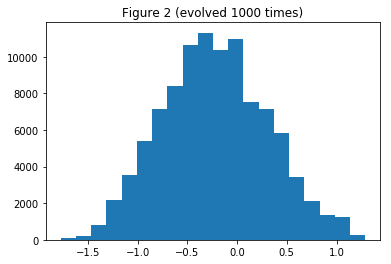

In [2257]:
times = []
energies = []
P_pos = []
P_neg = []
def getHistogram(ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(ions)
        if y is not 0:
            times.append(leastTime[0]+ times[y-1])
        else:
            times.append(leastTime[0])
        energy = 0
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(ions[x].position)
            vels.append(ions[x].velocity)
            energy += (ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif ions[x].charge is 1 and ions[x-1].charge is 1:
                P_pos.append((ions[x].position - ions[x-1].position))
            elif ions[x].charge is -1 and ions[x-1].charge is -1:
                P_pos.append((ions[x].position - ions[x-1].position))
            else:
                P_neg.append((ions[x].position - ions[x-1].position))
        energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(ions)):
            Acceleration(ions, x, False)
    if figure is 'positions':
        plt.hist(ion_positions, bins=20)
    else:
        plt.hist(vels, bins=20)
    plt.title('Figure 2 (evolved '+str(amount)+' times)')
    plt.show()
    #print(*vels, sep = '\n')
getHistogram(ions, 1000, 'vels')

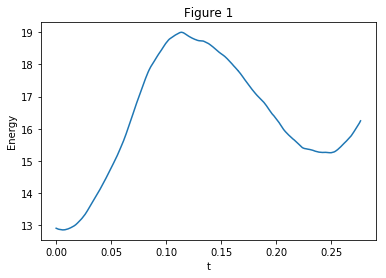

In [2258]:
plt.plot(times, energies)
plt.xlabel('t')
plt.ylabel('Energy')
plt.title('Figure 1')
plt.show()

In [2221]:
P_pos = []
P_neg = []
probability_neg = []
probability_pos = []
for x in range(len(ions)):
    for y in range(len(ions)):
        if x is y:
            continue;
        if ions[x].charge is ions[y].charge:
            P_pos.append(np.abs(ions[x].position - ions[y].position))
        elif ions[x].charge is not ions[y].charge:
            P_neg.append(np.abs(ions[x].position - ions[y].position))
P_neg.sort()
P_pos.sort()
for y in range(len(P_pos)):
    probability_pos.append(P_pos[y]/(P_pos[y]+P_neg[y]))
    probability_neg.append(P_neg[y]/(P_pos[y]+P_neg[y]))
slicer = slice(0, 4900)
slicer2 = slice(50, 4900)
P_neg = P_neg[slicer]
P_neg = P_neg[slicer2]
P_pos = P_pos[slicer2]
probability_neg = probability_neg[slicer2]
probability_pos = probability_pos[slicer2]

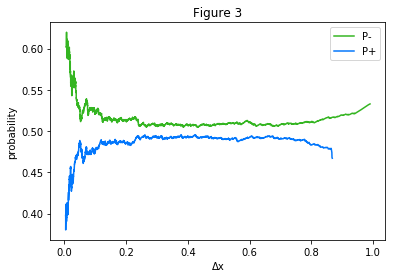

In [2222]:
plt.plot(P_pos, probability_pos, label='P-', color='#34b521')
plt.plot(P_neg, probability_neg, label='P+', color='#0377fc')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.ylabel('probability')
plt.legend(loc="upper right")
plt.show()

In [2223]:
log_prob = np.log(probability_neg)
print(np.polyfit(P_neg, log_prob, 1))

[ 0.07712571 -0.75330552]


In [2283]:
print(*P_neg, sep = '\n')
#print(*probability_neg, sep = '\n')

In [2144]:
getTable(ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
 1 	 63 	 0.0076248306375 	 -0.307242327497 		 1
 1 	 89 	 0.0148615058911 	 -0.831292802178 		 3
-1 	 100 	 0.0191979332011 	  1.25827498984 		 -3
-1 	 82 	 0.0229256632411 	 -0.365390902457 		 -1
 1 	 65 	 0.0349334140387 	 -0.648130399218 		 1
 1 	 49 	 0.0426057907076 	 -0.769413878805 		 3
-1 	 28 	 0.0511293547433 	 -0.13669098829 		 -3
 1 	 47 	 0.051258008387 	  0.208083012686 		 3
-1 	 24 	 0.0521851823507 	  0.395056655065 		 -3
-1 	 52 	 0.0529000517485 	  0.585611864204 		 -1
-1 	 42 	 0.059888114807 	 -0.116581336439 		 1
-1 	 64 	 0.0695887485251 	 -0.00772085577138 		 3
-1 	 88 	 0.0773058720948 	 -0.608918580164 		 5
-1 	 38 	 0.0832247755776 	 -0.510611569671 		 7
 1 	 67 	 0.0832787502679 	 -0.391237905995 		 -7
-1 	 48 	 0.0889607164767 	 -0.475040833415 		 7
 1 	 19 	 0.12591632093 	  0.273298291317 		 -7
 1 	 79 	 0.139606253706 	 -0.230614

In [2145]:
positive_less = 0
negative_less = 0
negative_more = 0
positive_more = 0
for x in range(len(ions)):
    if x < 50 and ions[x].charge is 1:
        positive_less+=1
    elif x < 50 and ions[x].charge is -1:
        negative_less+=1
    elif x >= 50 and ions[x].charge is 1:
        positive_more+=1
    else:
        negative_more+=1
print(positive_less, negative_less, positive_more, negative_more)
Acceleration(ions, 49, True)
print("END CODING")
print("_______________________________________________________________________________________________________")

25 25 25 25
Ion: 12 
Positive ions on left: 25 
Negative ions on left 24 
Positive ions on right: 25 
Negative ions on right 25
END CODING
_______________________________________________________________________________________________________


# Post lab writeup
What does figure 1 mean?
- Figure 1 shows kinetic energy vs time of the system. When t is small, kinetic energy oscillates rapidly. This is because equilibrium is far from being reached; opposite charged particles are next to each other at the beginning and before movement they hold just potential energy. As the system evolves, the potential energy is converted to kinetic as particles are pushed away from each other. The velocity increases, giving a local maximum in kinetic energy, and then as the distance increases from the original opposing particle, the distance to others is smaller. The charge from these other particles slows down incoming, high velocity particles, and as the opposing charge slows down the particle, kinetic energy drops again and potential energy is high.

What does figure 2 mean?
- Figure 2 tells us that the distribution of velocity follows a Maxwell distribution. This is important because it shows that our code was correct in respect to calculating velocities due to applied force. It proves that over a range from -1 to 1, most particles have a velocity towards the center, and very few have the max velocities. An equal amount of particles have opposite charge, forcing particles to bounce back and forth between oppositely charged particles. If you take the average of these oscillations, they will be near zero, which is why the graph shows a maximum number of particles around v = 0.

What does figure 3 mean?
- Figure 3 represents the probability that particles of either opposite or same charge will be a certain distance from each other. This is important to the study because it is a different way of telling us that opposite charges repel each other. If you look at the particles that are directly next to each other, 60% of them are opposite charges and 40% are the same. The graph also shows that the probability reaches 50% at a distance of around .15. This could either mean that opposing charges are no longer forceful at a distance of .15, or that in our system, when opposing particles are that far apart, other particles present are close enough to apply a force that cancels out the original repelling force.

## Plasma Simulation Lab by Sam Olson and Jess Bosch

*Note: The following code is for 1000 ions and then 10 ions*

In [2146]:
temp_ions = np.linspace(1, 1000, 1000)
new_position = []
for x in range(len(temp_ions)):
    new_position.append(random.random())
new_ions = []
for x in range(len(temp_ions)):
    new_ions.append(ion(temp_ions[x], x, new_position[x]))
for x in range(len(new_ions)):
    new_ions = sortByPosition(new_ions)
    Acceleration(new_ions, x, False)
getTable(new_ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 930 	 0.0004957652650747768 	 -0.010440486911415858 		 1
 1 	 133 	 0.0006369066722208272 	 -0.8828196743268207 		 -1
 1 	 321 	 0.0016769603914859044 	 -0.3679868574041225 		 1
 1 	 467 	 0.0018585039343885779 	  0.19849251101409823 		 3
 1 	 185 	 0.0023727191915775547 	 -0.5636805160683878 		 5
-1 	 596 	 0.002737750972173769 	 -0.6806846358327455 		 -5
-1 	 56 	 0.0036507826670630905 	 -0.6426995927174675 		 -3
-1 	 564 	 0.0053193266345091805 	  0.05227701025732075 		 -1
 1 	 421 	 0.007756082996385749 	 -0.935294761131653 		 1
 1 	 221 	 0.007888026183301866 	 -0.17828753551302856 		 3
 1 	 483 	 0.009257027280601182 	 -0.2949247543498899 		 5
-1 	 674 	 0.009630892815595704 	 -0.19178447301214951 		 -5
-1 	 34 	 0.011103094347187592 	 -0.34535554815160274 		 -3
-1 	 782 	 0.011650452763018126 	 -0.37941746371930507 		 -1
 1 	 295 	 0.011817335829598

 1 	 863 	 0.3134016460138046 	 -0.1928160376636272 		 -17
 1 	 459 	 0.3142367159389604 	 -0.4459399148661891 		 -15
-1 	 128 	 0.31452086268500734 	 -0.02285726806675805 		 15
-1 	 834 	 0.3149083706459258 	  0.0482981052378109 		 17
-1 	 792 	 0.31616643690347324 	 -0.5028406189425244 		 19
 1 	 727 	 0.3170404414643899 	 -0.7482394032435523 		 -19
-1 	 98 	 0.3179900291211838 	 -0.3640474698733013 		 19
-1 	 250 	 0.3190281724566393 	 -0.3856960175205826 		 21
-1 	 152 	 0.3193123755870697 	 -0.5347891257609758 		 23
 1 	 637 	 0.3196057025229393 	  0.493387453178082 		 -23
 1 	 289 	 0.32017519922133864 	 -0.214439422829656 		 -21
 1 	 609 	 0.32055984609705945 	  0.02863519103166316 		 -19
 1 	 171 	 0.321154359697015 	  0.06593262901748966 		 -17
 1 	 297 	 0.3222353741374707 	 -0.9551509123972678 		 -15
-1 	 252 	 0.3225007943161098 	  0.007975576345390777 		 15
-1 	 76 	 0.3226645238958703 	 -0.10011452747069632 		 17
-1 	 490 	 0.32368702509263503 	 -0.8469330620463176 		 19


-1 	 946 	 0.5189516598664234 	 -0.4499074493694206 		 -5
 1 	 907 	 0.5194859496256647 	 -0.39579882019371027 		 5
 1 	 433 	 0.5235735245652641 	  0.11247689549529011 		 7
-1 	 692 	 0.5236083036556428 	 -0.6541637421378738 		 -7
-1 	 282 	 0.524226550432381 	 -0.14624883594186777 		 -5
 1 	 959 	 0.5254873238155279 	  0.07416012896203397 		 5
-1 	 584 	 0.5255051361855999 	 -0.4261643178697494 		 -5
 1 	 859 	 0.5267467133418916 	 -0.25817478062602794 		 5
 1 	 337 	 0.5274919344592361 	 -0.7312393977114262 		 7
 1 	 181 	 0.5292381798501288 	 -0.7490054951289562 		 9
-1 	 914 	 0.529761678278817 	 -0.4140423291949573 		 -9
-1 	 676 	 0.530494647018007 	  0.2598470759483378 		 -7
 1 	 3 	 0.5308324294471396 	 -0.2003944468413743 		 7
 1 	 281 	 0.5339575380617231 	 -0.8941688148261366 		 9
 1 	 373 	 0.5351907046008928 	 -0.130982876095721 		 11
 1 	 143 	 0.5360672455237323 	 -0.10678643434044965 		 13
-1 	 272 	 0.5366314590845654 	 -0.05557973421266893 		 -13
-1 	 14 	 0.53857597

-1 	 154 	 0.7229836634829037 	  0.11940347513103342 		 47
-1 	 96 	 0.7232850484587476 	 -0.4855744293795774 		 49
-1 	 648 	 0.7233601559506024 	 -0.02464396212560217 		 51
-1 	 608 	 0.723898337392603 	 -0.19203073322558947 		 53
-1 	 492 	 0.7240307926916967 	  0.05429987059210484 		 55
 1 	 461 	 0.7241831219404039 	 -0.020898894870217677 		 -55
 1 	 953 	 0.7246137288931493 	 -0.17666603566426406 		 -53
 1 	 517 	 0.7247198460144814 	 -0.2829177041252806 		 -51
 1 	 773 	 0.7257912661682243 	  0.27694417853655284 		 -49
 1 	 27 	 0.7292615189768331 	  0.6227990534921721 		 -47
 1 	 681 	 0.7303012315900869 	 -0.019630095553775626 		 -45
-1 	 644 	 0.7310108787673449 	  0.23942155453687525 		 45
-1 	 790 	 0.7313115608445911 	 -0.42742202047797084 		 47
 1 	 441 	 0.7314541774879856 	 -0.13325984208313413 		 -47
-1 	 126 	 0.7318416390882676 	 -0.4033660043801435 		 47
 1 	 447 	 0.7322750856843998 	 -0.18549642308544181 		 -47
 1 	 363 	 0.7339759808647641 	 -0.45058989415533685 

 1 	 61 	 0.9182649037213296 	 -0.7495345482671412 		 -35
 1 	 97 	 0.9186757330650727 	 -0.056008959969876905 		 -33
 1 	 397 	 0.9213795927511385 	 -0.58618229002711 		 -31
-1 	 958 	 0.9218118560868056 	 -0.1664221103775289 		 31
 1 	 903 	 0.926227466383091 	 -0.1953800905002099 		 -31
-1 	 148 	 0.9263506696011558 	 -0.004064269451048985 		 31
 1 	 625 	 0.9267303701027685 	  0.3856386477107121 		 -31
 1 	 737 	 0.9272052180797126 	  0.019629754941598732 		 -29
 1 	 833 	 0.9282769531405576 	  0.13504850919181738 		 -27
-1 	 446 	 0.9285437030016662 	  0.5735021579536965 		 27
 1 	 91 	 0.9309239732830973 	  0.9683202490367241 		 -27
 1 	 885 	 0.9323358116817966 	 -0.5538658117289336 		 -25
 1 	 211 	 0.9337969914364245 	 -0.7686227538627547 		 -23
-1 	 116 	 0.9340721119288552 	 -0.23209176232590473 		 23
 1 	 977 	 0.9347153348623254 	 -0.4974742803126465 		 -23
 1 	 533 	 0.9356386554463314 	 -0.06334774130422971 		 -21
 1 	 531 	 0.9364452222505579 	  0.2590647020180737 		 -1

In [2147]:
new_times = []
new_energies = []
new_P_pos = []
new_P_neg = []
new_probability_neg = []
new_probability_pos = []
def getHistogram(new_ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(new_ions)
        if y is not 0:
            new_times.append(leastTime[0]+ new_times[y-1])
        else:
            new_times.append(leastTime[0])
        energy = 0
        for x in range(len(new_ions)):
            evolve(new_ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(new_ions[x].position)
            vels.append(new_ions[x].velocity)
            energy += (new_ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif new_ions[x].charge is 1 and new_ions[x-1].charge is 1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            elif new_ions[x].charge is -1 and new_ions[x-1].charge is -1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            else:
                new_P_neg.append((new_ions[x].position - new_ions[x-1].position))
        new_energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(new_ions)):
            Acceleration(new_ions, x, False)
   # if figure is 'positions':
      #  plt.hist(ion_positions, bins=20)
    #else:
        #plt.hist(vels, bins=20)
    plt.title('Figure 2 (evolved '+str(amount)+' times)')
    #plt.show()
getHistogram(new_ions, 100, 'vels')

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


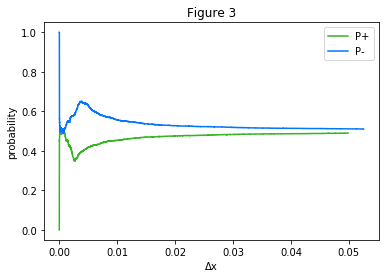

In [2149]:
for x in range(len(new_ions)):
    for y in range(len(new_ions)):
        if x is y:
            continue;
        if new_ions[x].charge is new_ions[y].charge:
            new_P_pos.append(np.abs(new_ions[x].position - new_ions[y].position))
        elif new_ions[x].charge is not new_ions[y].charge:
            new_P_neg.append(np.abs(new_ions[x].position - new_ions[y].position))
new_P_neg.sort()
new_P_pos.sort()
for y in range(len(new_P_neg)):
    new_probability_pos.append(new_P_pos[y]/(new_P_pos[y]+new_P_neg[y]))
    new_probability_neg.append(new_P_neg[y]/(new_P_pos[y]+new_P_neg[y]))
slicer2 = slice(50, 150000)
new_P_neg = new_P_neg[slicer2]
new_P_pos = new_P_pos[slicer2]
new_probability_neg = new_probability_neg[slicer2]
new_probability_pos = new_probability_pos[slicer2]
plt.plot(new_P_pos, new_probability_pos, label='P+', color='#34b521')
plt.plot(new_P_neg, new_probability_neg, label='P-', color='#0377fc')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.ylabel('probability')
plt.legend(loc="upper right")
plt.show()

In [2227]:
#print(*new_P_neg, sep = '\n')
print(*new_probability_neg, sep = '\n')
#print(new_P_neg, new_probability_neg)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.6090138933e-16
7.19549574314e-16
7.10838971734e-16
1.42167794347e-15
1.41238453552e-15
1.40414467271e-15
1.40348479304e-15
1.39847132596e-15
2.78306096309e-15
2.78306096309e-15
2.75224155636e-15
2.73709109607e-15
2.94420692105e-15
3.35186827697e-15
4.00454845146e-15
5.30955446412e-15
5.23032871052e-15
5.16106606829e-15
5.15842938427e-15
5.14325871171e-

0.318761955511
0.318301131643
0.318079334046
0.318622213698
0.318822886757
0.319024451913
0.318498224751
0.318708993291
0.318558952092
0.318471947929
0.318772154812
0.318840182294
0.319236117726
0.319013829736
0.319013829736
0.31895639812
0.318666808995
0.318611389949
0.318571467257
0.318461992425
0.318267559621
0.318192265747
0.318096840323
0.317706639073
0.317586622547
0.318188824549
0.318559421115
0.319049153644
0.319076136175
0.319107548869
0.320022099562
0.320119766703
0.320221179501
0.320144555754
0.320242246359
0.31995913834
0.31961780661
0.319607429867
0.319713667701
0.320193116749
0.319412003435
0.320081630849
0.319852005479
0.320197949181
0.320130001295
0.32036099067
0.320455375295
0.321174853596
0.32117032153
0.321124120706
0.321383039193
0.321321967845
0.321755956159
0.321589338957
0.32170519854
0.32227565659
0.322782970096
0.32263402979
0.322801584422
0.322836775908
0.322738102924
0.322067019855
0.32207320771
0.32227434932
0.322429102061
0.322419664447
0.322369834943
0.321

In [2155]:
temp_ions = np.linspace(1, 10, 10)
new_position = []
for x in range(len(temp_ions)):
    new_position.append(random.random())
new_ions = []
for x in range(len(temp_ions)):
    new_ions.append(ion(temp_ions[x], x, new_position[x]))
for x in range(len(new_ions)):
    new_ions = sortByPosition(new_ions)
    Acceleration(new_ions, x, False)
getTable(new_ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 4 	 0.47712966814683744 	 -0.4273735836623762 		 1
 1 	 3 	 0.49916064947416694 	 -0.23535858229554196 		 -1
-1 	 10 	 0.5845194560790036 	 -0.3288399325855422 		 1
 1 	 9 	 0.5935006213823283 	 -0.021473489516278022 		 -1
-1 	 2 	 0.7085682371279091 	 -0.20964625623011135 		 1
 1 	 1 	 0.824483096914356 	 -0.7571787350514354 		 -1
 1 	 7 	 0.8623054881383482 	 -0.10093175261778853 		 1
 1 	 5 	 0.8773404942676166 	  0.03400302151022876 		 3
-1 	 6 	 0.8799386071362509 	 -0.01866275145968853 		 -3
-1 	 8 	 0.9652553733300167 	 -0.1575198415848481 		 -1


In [2156]:
new_times = []
new_energies = []
new_P_pos = []
new_P_neg = []
new_probability_neg = []
new_probability_pos = []
def getHistogram(new_ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(new_ions)
        if y is not 0:
            new_times.append(leastTime[0]+ new_times[y-1])
        else:
            new_times.append(leastTime[0])
        energy = 0
        for x in range(len(new_ions)):
            evolve(new_ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(new_ions[x].position)
            vels.append(new_ions[x].velocity)
            energy += (new_ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif new_ions[x].charge is 1 and new_ions[x-1].charge is 1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            elif new_ions[x].charge is -1 and new_ions[x-1].charge is -1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            else:
                new_P_neg.append((new_ions[x].position - new_ions[x-1].position))
        new_energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(new_ions)):
            Acceleration(new_ions, x, False)
    #if figure is 'positions':
     #   plt.hist(ion_positions, bins=20)
    #else:
        #plt.hist(vels, bins=20)
    plt.title('Figure 2 (evolved '+str(amount)+' times)')
    #plt.show()
getHistogram(new_ions, 1000, 'vels')

In [2157]:
for x in range(len(new_ions)):
    for y in range(len(new_ions)):
        if x is y:
            continue;
        if new_ions[x].charge is new_ions[y].charge:
            new_P_pos.append(np.abs(new_ions[x].position - new_ions[y].position))
        elif new_ions[x].charge is not new_ions[y].charge:
            new_P_neg.append(np.abs(new_ions[x].position - new_ions[y].position))
new_P_neg.sort()
new_P_pos.sort()
for y in range(len(new_P_pos)):
    new_probability_pos.append(new_P_pos[y]/(new_P_pos[y]+new_P_neg[y]))
    new_probability_neg.append(new_P_neg[y]/(new_P_pos[y]+new_P_neg[y]))
slicer2 = slice(500, 3000)
new_P_neg = new_P_neg[slicer2]
new_P_pos = new_P_pos[slicer2]
new_probability_neg = new_probability_neg[slicer2]
new_probability_pos = new_probability_pos[slicer2]

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


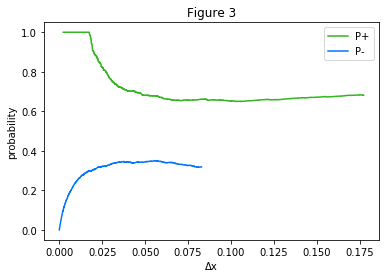

In [2167]:
plt.plot(new_P_pos, new_probability_pos, label='P+', color='#34b521')
plt.plot(new_P_neg, new_probability_neg, label='P-', color='#0377fc')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.ylabel('probability')
plt.legend(loc="upper right")
plt.show()

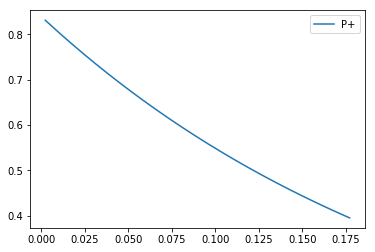

[-4.24437276 -0.17529906]


In [2171]:
log_new_prob = np.log(new_probability_pos)
vals = np.polyfit(new_P_neg, log_new_prob, 1)
old_y = []
for i in range(len(new_P_pos)):
    old_y.append(vals[0] * new_P_pos[i])
y = np.exp(vals[1]) * np.exp(old_y)
plt.plot(new_P_pos, y, label = 'P+')
plt.legend(loc="upper right")
plt.show()
print(np.polyfit(new_P_neg, log_new_prob, 1))

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


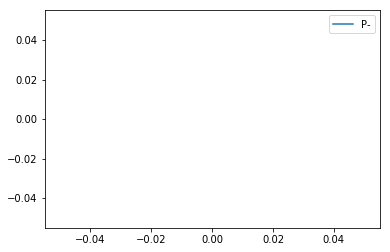

In [2170]:
log_new_prob = []
vals = []
for i in range(len(new_probability_neg)):
    if new_probability_neg[i] is not 0:
        log_new_prob.append(np.log(new_probability_neg[i]))
vals = np.polyfit(new_P_neg, log_new_prob, 1)
old_y = []
for i in range(len(new_P_neg)):
    old_y.append(vals[0] * new_P_neg[i])
y = np.exp(vals[1]) * np.exp(old_y)
plt.plot(new_P_neg, y, label = 'P-')
plt.legend(loc="upper right")
plt.show()